In [1]:
from functools import partial
from pathlib import Path
import rasterio as rio
from matplotlib import pyplot as plt
import sys


sys.path.insert(0, str(Path.cwd().parent))

from omnicloudmask import (
    predict_from_load_func,
    predict_from_array,
    load_ls8,
    load_multiband,
    load_s2,
)

In [2]:
import omnicloudmask

omnicloudmask.__version__

'1.7.0'

In [3]:
%run setup_test_data.py

Test data setup complete.


In [4]:
test_data_dir = Path.cwd() / "test data"
test_data_dir.exists()

True

In [5]:
s2_l2a_Path = (
    test_data_dir / "S2A_MSIL2A_20170725T142751_N9999_R053_T19GBQ_20240410T040247.SAFE"
)
s2_l1c_Path = (
    test_data_dir / "S2B_MSIL1C_20180302T150259_N0206_R125_T22WES_20180302T183800.SAFE"
)
ls_path = test_data_dir / "LC81960302014022LGN00"

maxar_path = test_data_dir / "maxar.tif"
s2_l1c_Path.exists(), s2_l2a_Path.exists(), ls_path.exists(), maxar_path.exists()

(True, True, True, True)

In [6]:
s2_items = [s2_l2a_Path, s2_l1c_Path]
ls_items = [ls_path]

In [7]:
load_multiband_maxar = partial(load_multiband, resample_res=10, band_order=[1, 2, 4])

In [8]:
pred_paths = predict_from_load_func(
    load_func=load_s2, scene_paths=s2_items, inference_dtype="bf16", batch_size=2
)

Running inference using mps bfloat16:   0%|          | 0/2 [00:00<?, ?it/s]

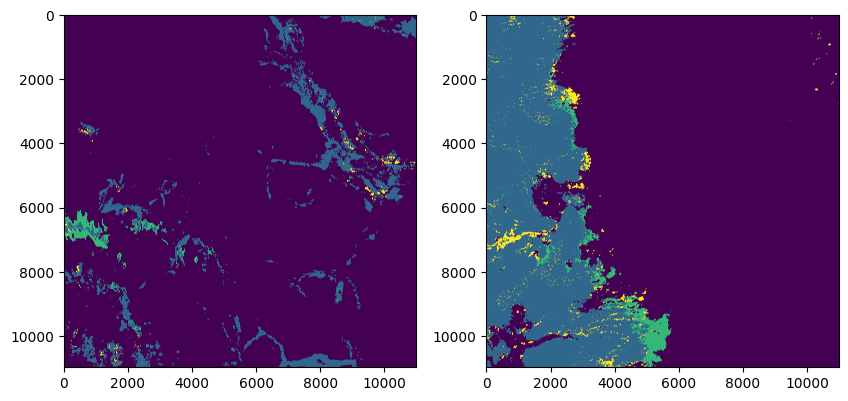

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for ax, path in zip(axs, pred_paths):
    with rio.open(path) as src:
        ax.imshow(src.read(1))
plt.show()

In [10]:
load_s2_21m = partial(load_s2, resolution=21.0)
pred_paths = predict_from_load_func(
    load_func=load_s2_21m, scene_paths=s2_items, inference_dtype="bf16", batch_size=2
)

Running inference using mps bfloat16:   0%|          | 0/2 [00:00<?, ?it/s]

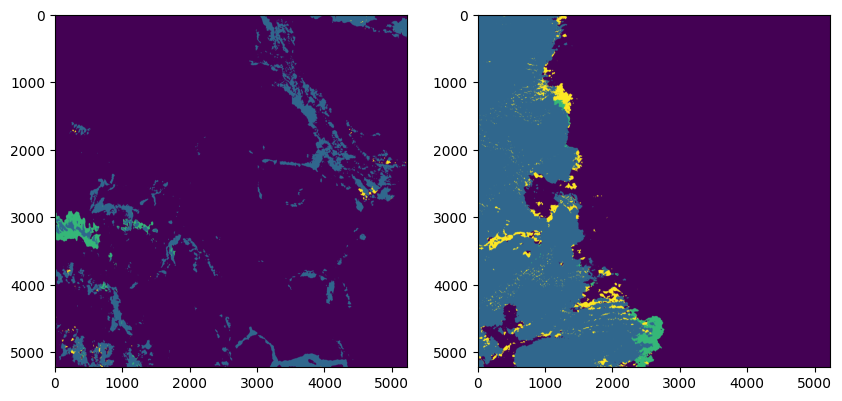

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for ax, path in zip(axs, pred_paths):
    with rio.open(path) as src:
        ax.imshow(src.read(1))
plt.show()

Running inference using mps bfloat16:   0%|          | 0/1 [00:00<?, ?it/s]

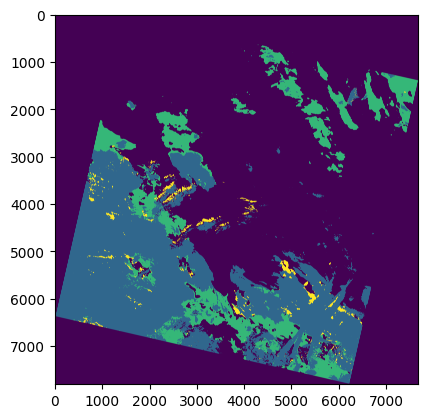

In [12]:
pred_paths = predict_from_load_func(
    load_func=load_ls8, scene_paths=ls_items, inference_dtype="bf16", batch_size=2
)

pred_array = rio.open(pred_paths[0]).read(1)
plt.imshow(pred_array, vmin=0, vmax=3)

Running inference using mps bfloat16:   0%|          | 0/1 [00:00<?, ?it/s]

/Users/nick/Documents/Work Code/OmniCloudMask/omnicloudmask/cloud_mask.py:257: UserWarning: Patch size too large, reducing to 531 and overlap to 265.
  patch_overlap, patch_size = check_patch_size(


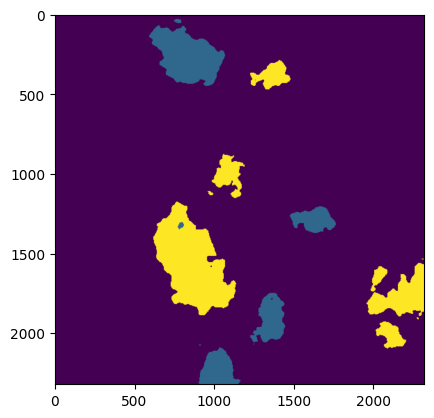

In [13]:
pred_paths = predict_from_load_func(
    load_func=load_multiband_maxar,
    scene_paths=[maxar_path],
    inference_dtype="bf16",
    batch_size=2,
)

pred_array = rio.open(pred_paths[0]).read(1)
plt.imshow(pred_array, vmin=0, vmax=3)

Running inference using mps float32:   0%|          | 0/1 [00:00<?, ?it/s]

/Users/nick/Documents/Work Code/OmniCloudMask/omnicloudmask/cloud_mask.py:257: UserWarning: Patch size too large, reducing to 531 and overlap to 265.
  patch_overlap, patch_size = check_patch_size(


Running inference using mps float16:   0%|          | 0/1 [00:00<?, ?it/s]

/Users/nick/Documents/Work Code/OmniCloudMask/omnicloudmask/cloud_mask.py:257: UserWarning: Patch size too large, reducing to 531 and overlap to 265.
  patch_overlap, patch_size = check_patch_size(


Running inference using mps bfloat16:   0%|          | 0/1 [00:00<?, ?it/s]

/Users/nick/Documents/Work Code/OmniCloudMask/omnicloudmask/cloud_mask.py:257: UserWarning: Patch size too large, reducing to 531 and overlap to 265.
  patch_overlap, patch_size = check_patch_size(


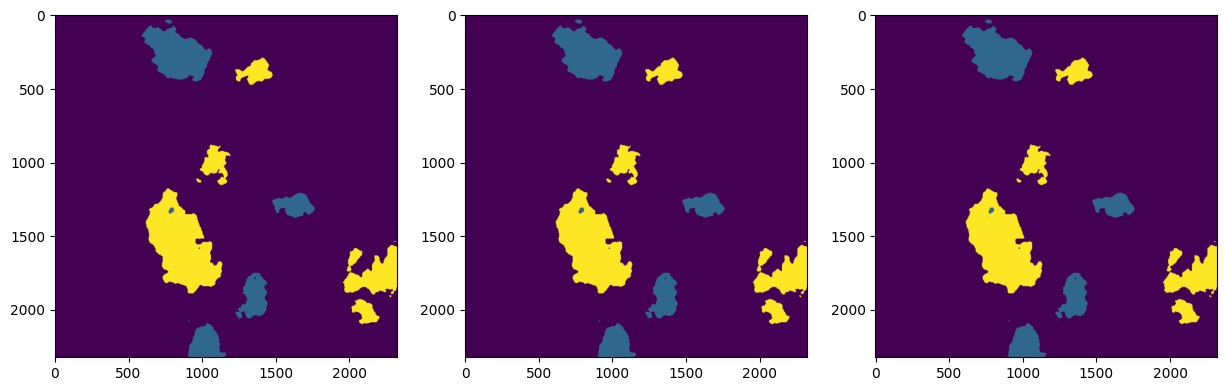

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, dtype in zip(axs, ["float32", "float16", "bfloat16"]):
    pred_paths = predict_from_load_func(
        load_func=load_multiband_maxar,
        scene_paths=[maxar_path],
        inference_dtype=dtype,
        batch_size=2,
    )
    pred_array = rio.open(pred_paths[0]).read(1)
    ax.imshow(pred_array, vmin=0, vmax=3)

/Users/nick/Documents/Work Code/OmniCloudMask/omnicloudmask/cloud_mask.py:257: UserWarning: Patch size too large, reducing to 531 and overlap to 265.
  patch_overlap, patch_size = check_patch_size(


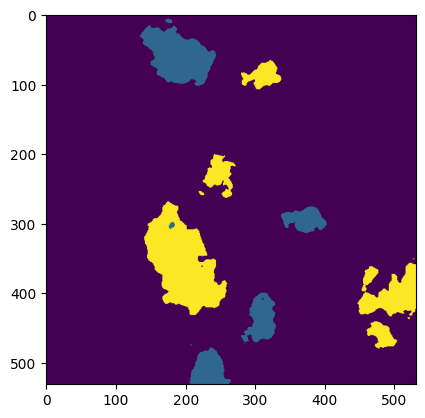

In [15]:
RGNIR_array = load_multiband_maxar(maxar_path)[0]
pred_array = predict_from_array(RGNIR_array)
plt.imshow(pred_array[0], vmin=0, vmax=3)

Running inference using cpu float32:   0%|          | 0/1 [00:00<?, ?it/s]

/Users/nick/Documents/Work Code/OmniCloudMask/omnicloudmask/cloud_mask.py:257: UserWarning: Patch size too large, reducing to 531 and overlap to 265.
  patch_overlap, patch_size = check_patch_size(


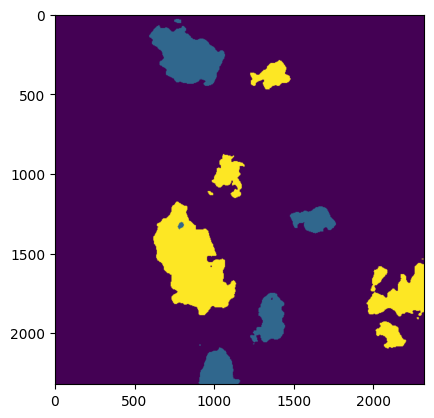

In [16]:
pred_paths = predict_from_load_func(
    load_func=load_multiband_maxar,
    scene_paths=[maxar_path],
    inference_device="cpu",
)

pred_array = rio.open(pred_paths[0]).read(1)
plt.imshow(pred_array, vmin=0, vmax=3)

In [17]:
outputs_to_remove = list(test_data_dir.glob("*OCM_v*"))
outputs_to_remove

[PosixPath('/Users/nick/Documents/Work Code/OmniCloudMask/tests/test data/maxar_OCM_v1_7_0.tif'),
 PosixPath('/Users/nick/Documents/Work Code/OmniCloudMask/tests/test data/S2A_MSIL2A_20170725T142751_N9999_R053_T19GBQ_20240410T040247_OCM_v1_7_0.tif'),
 PosixPath('/Users/nick/Documents/Work Code/OmniCloudMask/tests/test data/LC81960302014022LGN00_OCM_v1_7_0.tif'),
 PosixPath('/Users/nick/Documents/Work Code/OmniCloudMask/tests/test data/S2B_MSIL1C_20180302T150259_N0206_R125_T22WES_20180302T183800_OCM_v1_7_0.tif')]

In [18]:
for file in outputs_to_remove:
    file.unlink()